# TOPIC: KNN


                                                                                      Erubiel Tun Moo
                                                                                      09/10/2023
                                                                                      Machine Learning


###  -Explain of the intuition behind the KNN ALGORITHM

The K-Nearest Neighbors (KNN) algorithm is a supervised learning algorithm and for classification problems, the objective is to predict the class of an object from the classes of the k nearest objects in the feature space; The value of k can be chosen arbitrarily however this can significantly affect the accuracy of the results, since choosing a small value for k means that the prediction is based on few close neighbors, while a large value of k means that the prediction is based on many close neighbors. In this algorithm, the distance between objects is calculated using a distance measure and the most common is the Euclidean distance, which is defined as the square root of the sum of the squares of the differences between the coordinates of the two points.

### -Algorithm pseudocode

1. Import the necessary libraries.
2. Load the dataset.
3. Create DataFrames for x and y
4. Split the data set into training and testing
5. Initialize the value of k.
6. For each element in the data set:
   
   6.1 Calculate the distance between the element and the data point for which you want to make a prediction.
   
   6.2 Add the element's distance and label to a list.
   
7. Sort the list of distances in ascending order.
8. Get the k closest elements of the sorted list created in step 7.
9. Get the most common label of the k elements obtained in step 8.
10. Return the label obtained in step 6 as a prediction result.

### -Implementation of the algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values  # Edad y Salario estimado
y = dataset.iloc[:, 4].values  # Comprado (0 o 1)
df_x = pd.DataFrame(x, columns=['Age', 'Estimated Salary'])
df_y = pd.DataFrame(y, columns=['Purchased'])

display(df_x)
display(df_y)

,Age,Estimated Salary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [3]:
def train_test_split_custom(x, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    num_samples = len(x)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    test_size = int(test_size * num_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    x_train, y_train = x[train_indices], y[train_indices]
    x_test, y_test = x[test_indices], y[test_indices]
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = train_test_split_custom(x, y, test_size=0.20, random_state=0)

In [5]:
def standardize(x_train, x_test):
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std
    return x_train, x_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [7]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_pred = [self._predict(x) for x in x_test]
        return np.array(y_pred)

    def _predict(self, x):
        # Calcular las distancias entre x y todos los puntos de entrenamiento
        distances = [euclidean_distance(x, x_train) for x_train in self.x_train]
        # Obtener índices de los k vecinos más cercanos
        k_indices = np.argsort(distances)[:self.k]
        # Obtener las etiquetas de los k vecinos más cercanos
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Devolver la etiqueta más común entre los k vecinos
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [8]:
classifier = KNNClassifier(k=5)
classifier.fit(x_train, y_train)

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
def confusion_matrix_custom(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

cm = confusion_matrix_custom(y_test, y_pred)

def print_classification_results(cm):
    print("Classification Results:")
    for i in range(cm.shape[0]):
        correct = cm[i, i]
        incorrect = np.sum(cm[i, :]) - correct
        print(f"Class {i}: {correct} correctly classified, {incorrect} incorrects")

# Results
print_classification_results(cm)


Classification Results:
Class 0: 55 correctly classified, 3 incorrects
Class 1: 21 correctly classified, 1 incorrects


In [11]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

# accuracy
accuracy_score = accuracy(y_test, y_pred)
print("accuracy:", accuracy_score)

accuracy: 0.95


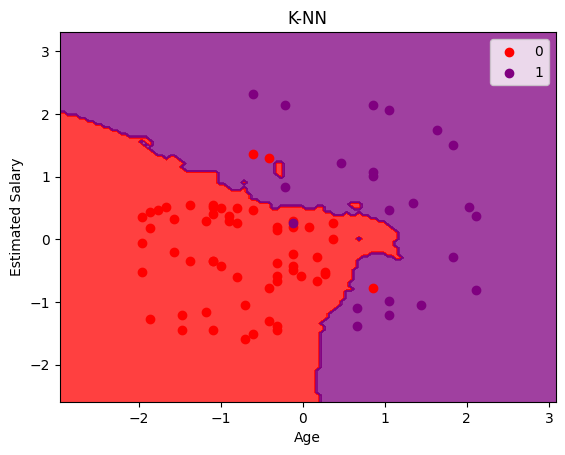

In [12]:
#Graph the results, this is additional; I just wanted to see the results graphed.

from matplotlib.colors import ListedColormap  # Agrega esta línea de importación

X_set, y_set = x_test, y_test
x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 0.05))


Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.75, cmap=ListedColormap(('red', 'purple')))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=[ListedColormap(('red', 'purple'))(i)], label=j)

plt.title('K-NN')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### - Loss function + Optimization function identification

In this particular case, the KNN algorithm has neither a loss function nor an optimization function because this algorithm does not learn any parametric model during the training process, but rather the KNN algorithm compares a new data with the stored training examples to determine to which class this new data belongs.